In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## K Means

In [3]:
from sklearn.datasets import make_blobs

In [4]:
# Define custom cluster centers for Service Quality Score and Loyalty
blob_centers = np.array([
    [1.5, 1.2],
    [2.0, 2.5],
    [2.5, 3.0],
    [3.5, 3.5],
    [4.0, 4.5]
])

# Define standard deviations for each cluster center
blob_std = np.array([0.5, 0.4, 0.3, 0.2, 0.3])

In [5]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

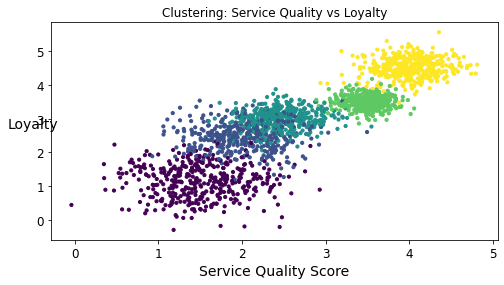

In [6]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    # Scatter plot for Service Quality Score vs Loyalty
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap="viridis")  # Adjusted size and color map
    plt.xlabel("Service Quality Score", fontsize=14)
    plt.ylabel("Loyalty", fontsize=14, rotation=0)
    plt.title("Clustering: Service Quality vs Loyalty")

# Plot the clusters with the generated data
plt.figure(figsize=(8, 4))
plot_clusters(X, y)
plt.show()

## Fit n Predict

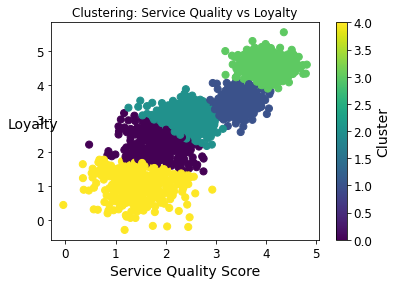

In [11]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Define the number of clusters
k = 5  # Choose an appropriate number of clusters based on your data analysis
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model and predict clusters
y_pred = kmeans.fit_predict(X)

# Plotting function
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="viridis")
    plt.xlabel("Service Quality Score", fontsize=14)
    plt.ylabel("Loyalty", fontsize=14, rotation=0)
    plt.title("Clustering: Service Quality vs Loyalty")
    plt.colorbar(label='Cluster')
    plt.show()

# Visualize clusters
plot_clusters(X, y_pred)

## Decision Boundaries

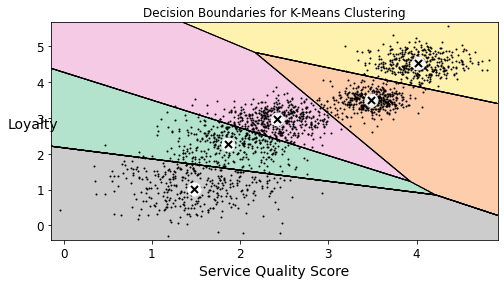

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=100, linewidths=4,  # Reduced size and linewidth for the circles
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2,  # Reduced size and linewidth for the crosses
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("Service Quality Score", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Loyalty", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Assuming 'kmeans' is already fitted on your dataset
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title("Decision Boundaries for K-Means Clustering")
plt.show()